<a href="https://colab.research.google.com/github/AndoniFikri/Ridge-Regression-Modelling-for-Energy-Usage-Prediction/blob/main/PersonalProject_Andoni_Fikri_Oktaviano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import Data Set, Data Cleansing, & Data Manipulation

In [190]:
df = pd.read_csv('energy data prediction.csv')

In [191]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097
5,11-01-2016 17:50,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484
6,11-01-2016 18:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763
7,11-01-2016 18:10,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890
8,11-01-2016 18:20,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702
9,11-01-2016 18:30,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

All data type is looking great! But, date feature is still object data type. Thus, we need to change it to time data type. 

In [193]:
#Changing Object Type Data to Datetime Data
df['date'] = pd.to_datetime(df['date'])

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

No Missing Value in the Data! No need for dropping any column.

In [195]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-11-01 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433
1,2016-11-01 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195
2,2016-11-01 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668
3,2016-11-01 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390
4,2016-11-01 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097
5,2016-11-01 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484
6,2016-11-01 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763
7,2016-11-01 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890
8,2016-11-01 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702
9,2016-11-01 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314


In [196]:
#Seperate Date and Time data 
df['date1'] = [d.date() for d in df['date']]
df['time'] = [d.time() for d in df['date']]


In [197]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date1,time
0,2016-11-01 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433,2016-11-01,17:00:00
1,2016-11-01 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195,2016-11-01,17:10:00
2,2016-11-01 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668,2016-11-01,17:20:00
3,2016-11-01 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390,2016-11-01,17:30:00
4,2016-11-01 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097,2016-11-01,17:40:00
5,2016-11-01 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484,2016-11-01,17:50:00
6,2016-11-01 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763,2016-11-01,18:00:00
7,2016-11-01 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890,2016-11-01,18:10:00
8,2016-11-01 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702,2016-11-01,18:20:00
9,2016-11-01 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314,2016-11-01,18:30:00


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [199]:
#Change Date1 feature to data time type
df['date1'] = pd.to_datetime(df['date1'])

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#Simple EDA

Would like to see the energy use based on time on one day. 

In [201]:
#Sort data that is taken on 2016-11-01
dfdate = df[df['date1']== '2016-11-01']
dfdate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         42 non-null     datetime64[ns]
 1   Appliances   42 non-null     int64         
 2   lights       42 non-null     int64         
 3   T1           42 non-null     float64       
 4   RH_1         42 non-null     float64       
 5   T2           42 non-null     float64       
 6   RH_2         42 non-null     float64       
 7   T3           42 non-null     float64       
 8   RH_3         42 non-null     float64       
 9   T4           42 non-null     float64       
 10  RH_4         42 non-null     float64       
 11  T5           42 non-null     float64       
 12  RH_5         42 non-null     float64       
 13  T6           42 non-null     float64       
 14  RH_6         42 non-null     float64       
 15  T7           42 non-null     float64       
 16  RH_7      

In [202]:
dfdate['time'] = dfdate['time'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


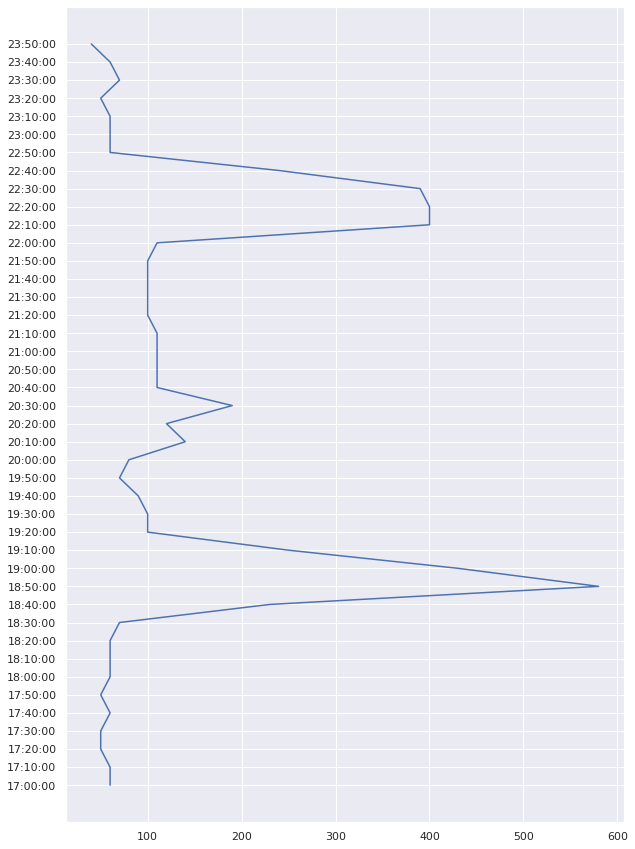

In [203]:
#Time Series Data Visualization
plt.figure(figsize = (10, 15))
plt.plot(dfdate['Appliances'],dfdate['time'])

Conclusion: 1 st Peak Load happened between 18:30 & 19:20 and 2nd peak load happened between 22:00 & 22:50

Question: What Feature that is highly correlated with Appliances?

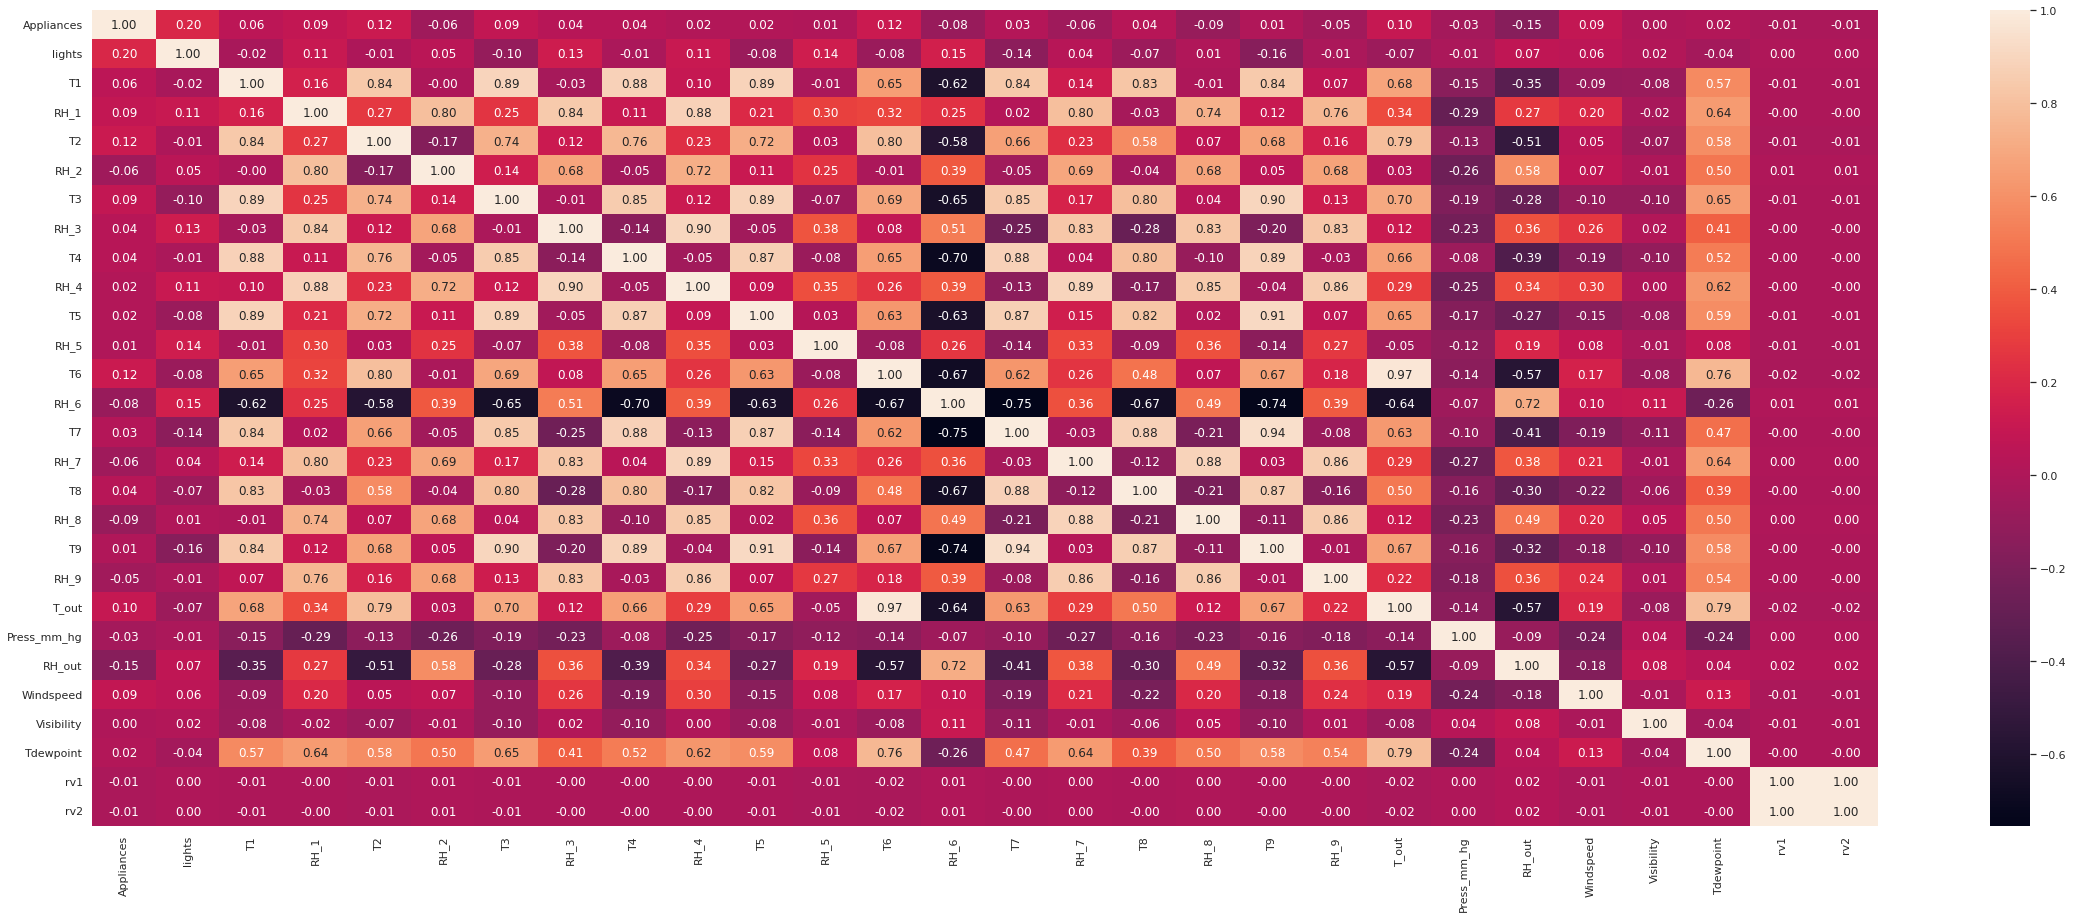

In [204]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.gcf().set_size_inches(40, 15)

Conclusion : From above heatmap correlation, `Appliances` value is highly correlated with `lights` energy consumption followed by `T2` Value, `T6` value, & `T_out` value.

#Machine Learning Model

Because we would like to see the prediction of `Appliances` value based on all feature exist, Ridge Regression model is used to predict the value.

In [205]:
#Drop Unused Data like date, date1, and time
df = df.drop(columns='date')
df = df.drop(columns='date1')
df = df.drop(columns='time')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

##Split Data: Train-Validation-Test

In [207]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='Appliances')
target = df[['Appliances']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

##Check For Multicollinearity

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,lights,1.291053
2,T1,19.889917
3,RH_1,16.359909
4,T2,29.635574
5,RH_2,22.122822
6,T3,9.924056
7,RH_3,10.836326
8,T4,9.956965
9,RH_4,17.090023
10,T5,10.589940


In [209]:
#Sort data that has vif score greater than 10 
viflarger10 = vif_df[vif_df['vif_score'] >= 10]
viflarger10.reset_index()

,index,feature,vif_score
0,2,T1,19.889917
1,3,RH_1,16.359909
2,4,T2,29.635574
3,5,RH_2,22.122822
4,7,RH_3,10.836326
5,9,RH_4,17.090023
6,10,T5,10.589940
7,12,T6,33.468131
8,13,RH_6,10.076674
9,14,T7,17.634337


We're gonna drop feature that is having a vif score greater than 10. Use correlation score greater than 0,8 to see if the multicollinearity exist.

Conclusion: Temperature data is highly correlated with another temperature data while Relative Humudity data is also highly correlated with another Relative Humidity data.

In [210]:
temperature = ['Appliances', 'T1', 'T2', 'T3','T4','T5','T6','T7','T8','T9', 'T_out', 'Tdewpoint']
RH = ['Appliances', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out']

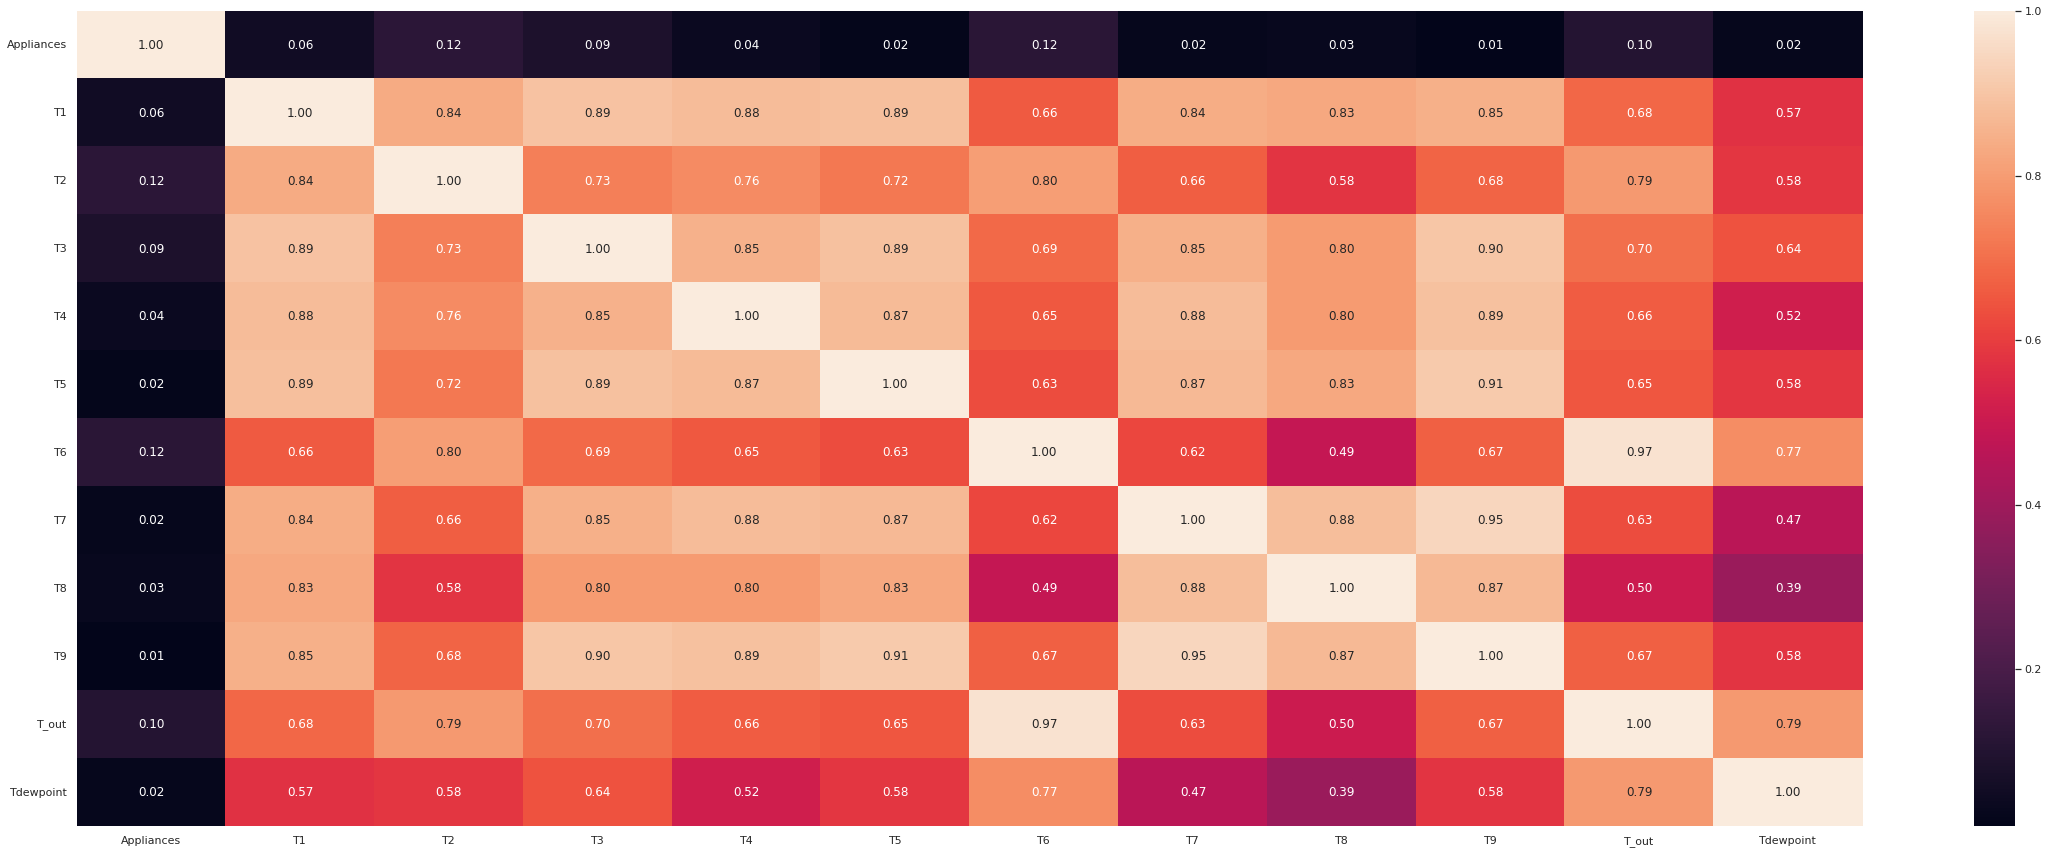

In [211]:
#Appliances and Temperature correlation heat map for training data
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
correlation2 = df_train[temperature].corr()
sns.heatmap(correlation2, annot=True, fmt='.2f')
plt.gcf().set_size_inches(40, 15)

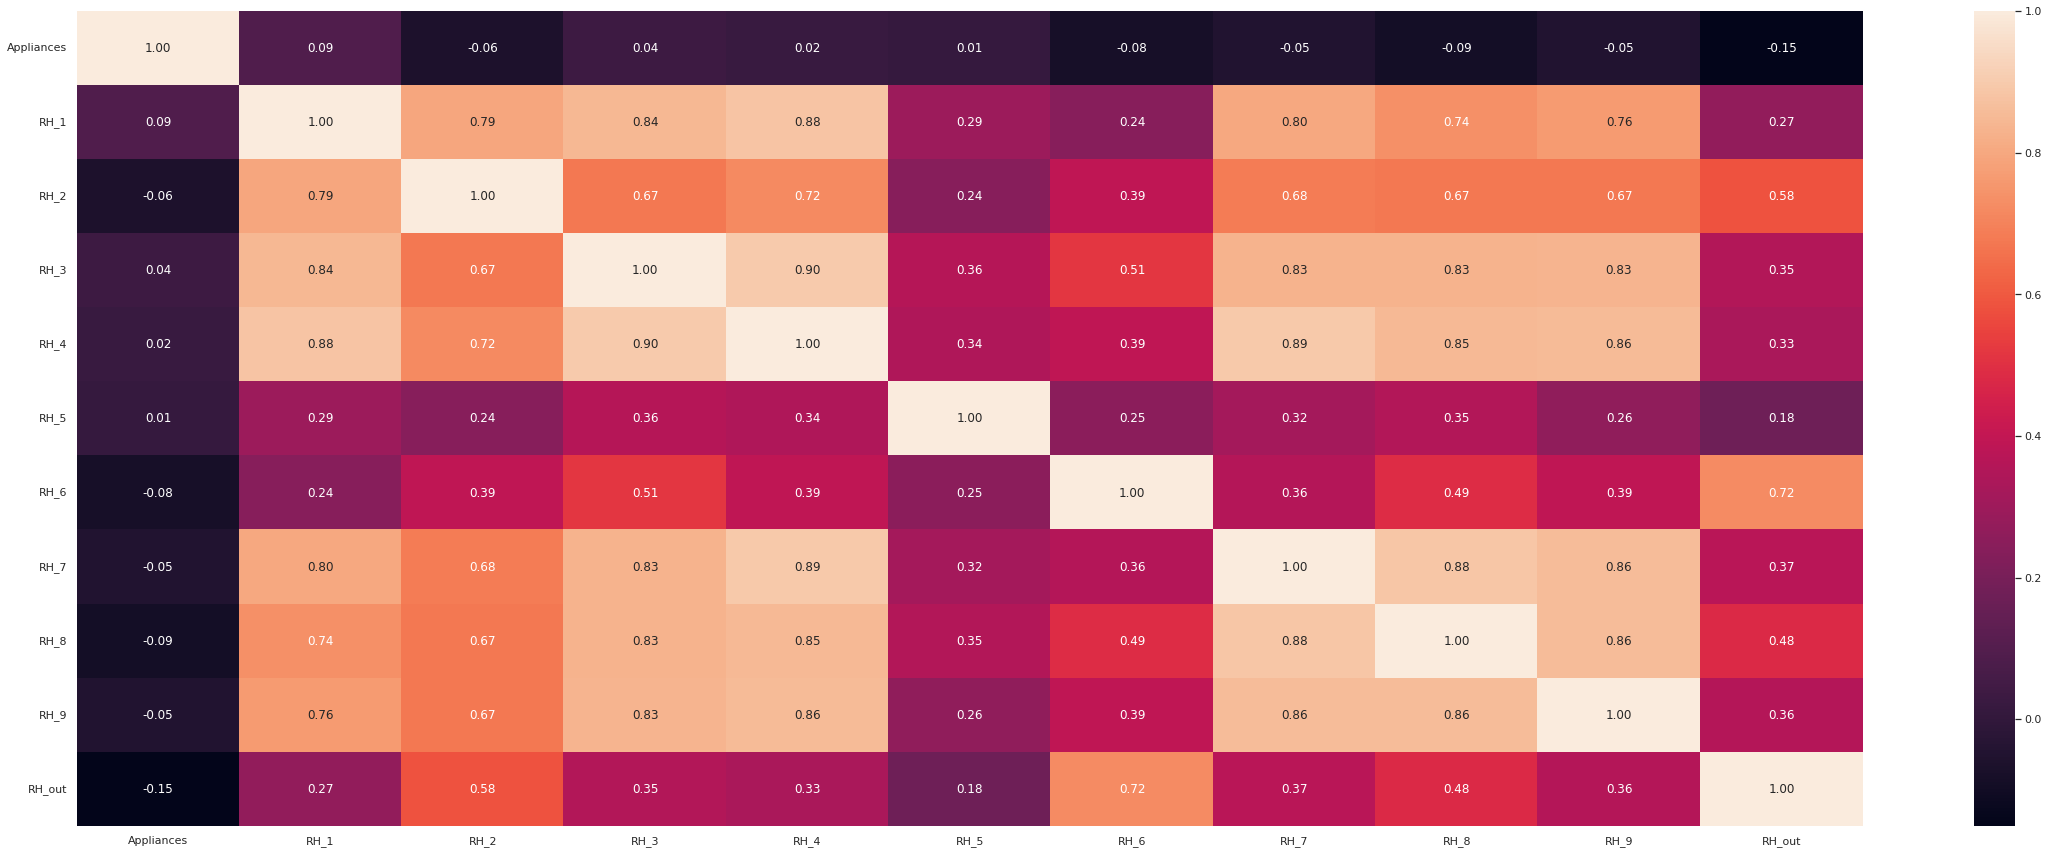

In [212]:
#Appliances and Relative Humidity correlation Heat Map 
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
correlation3 = df_train[RH].corr()
sns.heatmap(correlation3, annot=True, fmt='.2f')
plt.gcf().set_size_inches(40, 15)

Action: Maintain 3 feature that has a strong correlation with `Appliances`.

For temperature : 
1. `T2` and `Tout` because high correlation with `Appliances`. 
2. `Tdewpoint` because no correlation value greater than 0,8 with other temperature feature.

For Relative Humidity :
1.  `RH_1` and `RH_out` because high correlation with `Appliances`. 
2.  `RH_5` because no correlation value greater than 0,8 with other RH feature.

In [213]:
#Drop Column
feature_df_train = feature_df_train.drop(columns=['T1', 'T3','T4','T5','T6','T7','T8','T9', 'RH_2', 'RH_3', 'RH_4', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'rv1', 'rv2'])
feature_df_test = feature_df_test.drop(columns=['T1', 'T3','T4','T5','T6','T7','T8','T9', 'RH_2', 'RH_3', 'RH_4', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'rv1', 'rv2'])
feature_df_validation = feature_df_validation.drop(columns=['T1', 'T3','T4','T5','T6','T7','T8','T9', 'RH_2', 'RH_3', 'RH_4', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'rv1', 'rv2'])

In [214]:
#Recheck VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,lights,1.047258
2,RH_1,2.275410
3,T2,2.993578
4,RH_5,1.155523
5,T_out,107.965184
6,Press_mm_hg,1.162935
7,RH_out,38.302033
8,Windspeed,1.255595
9,Visibility,1.017669
10,Tdewpoint,72.812464


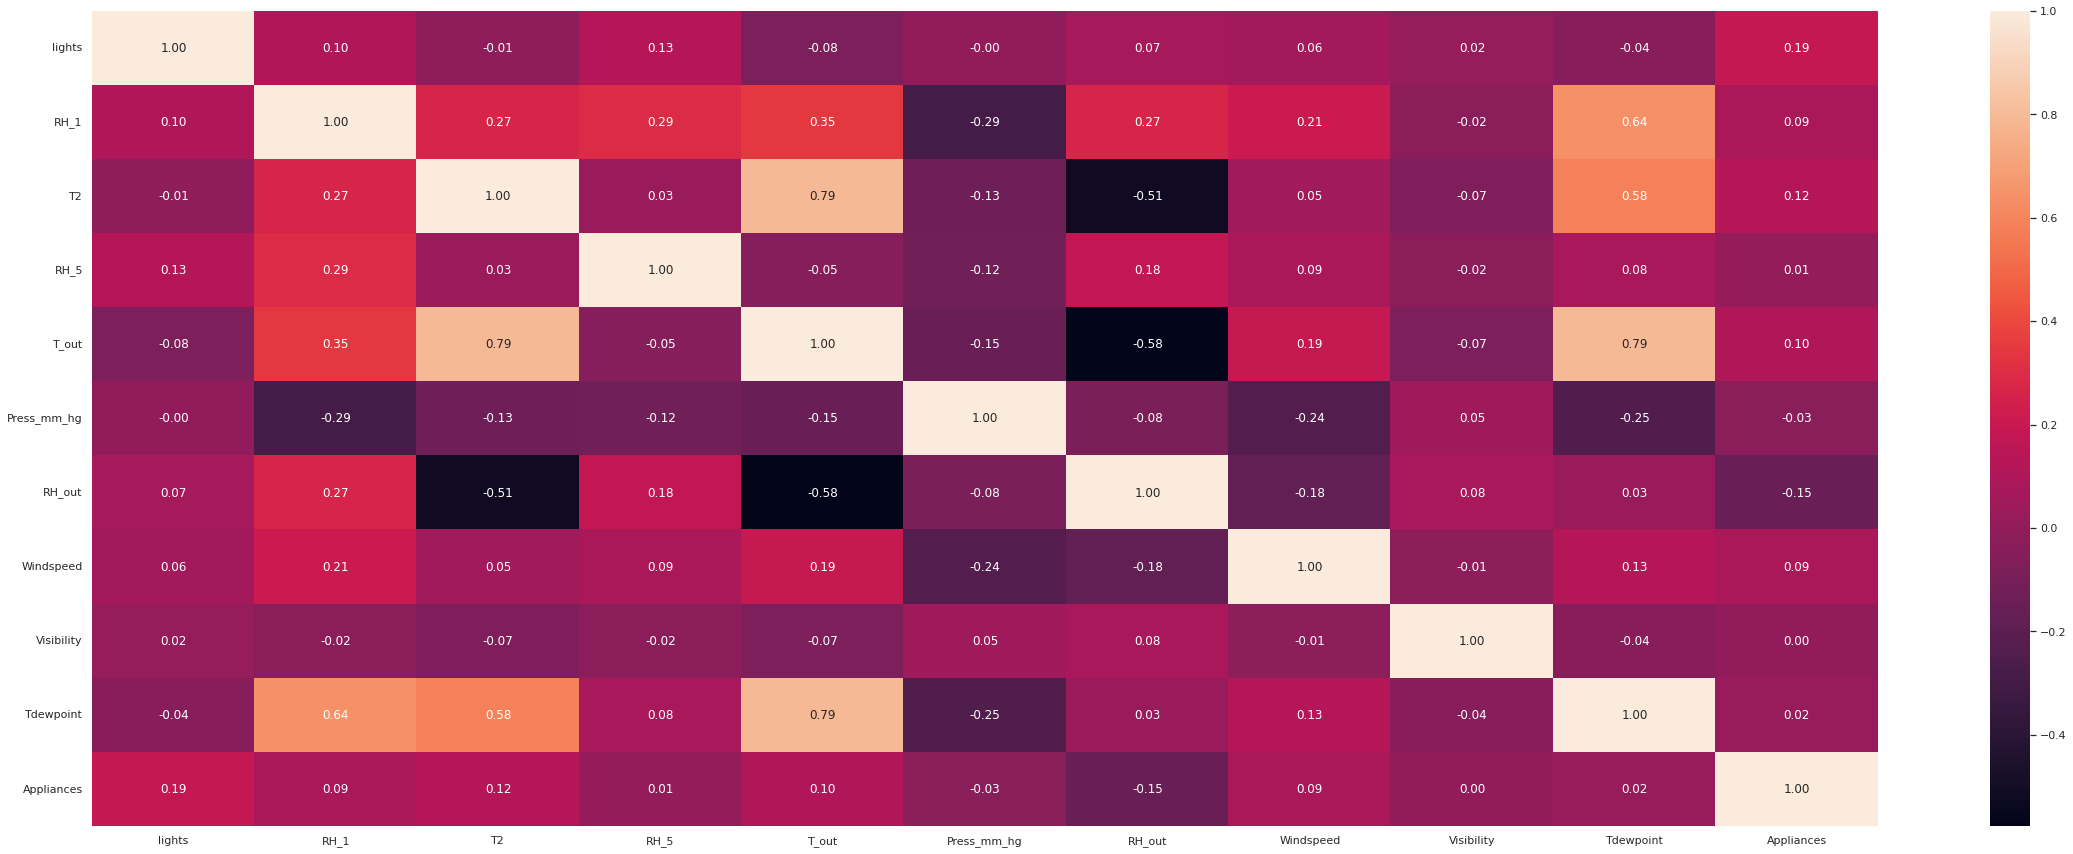

In [215]:
#Recheck for Correlation Heat Map 
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
correlation4 = df_train.corr()
sns.heatmap(correlation4, annot=True, fmt='.2f')
plt.gcf().set_size_inches(40, 15)

Everything Looks Good! No Correlation Value greater than 0,8.

##Fit The Model

In [216]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

##Evaluate The Best Lamda

In [217]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 95.99106736912537
RMSE of Ridge regression model with alpha = 0.1 is 95.99106657048675
RMSE of Ridge regression model with alpha = 1.0 is 95.9910586003168
RMSE of Ridge regression model with alpha = 10 is 95.99098050251743


Conclusion: Lambda equal to 10 is the best lambda because it produce the smallest RMSE Value.

##Model Evaluation


In [218]:
ridge_best = ridge_reg_ten
coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,242.307856
1,lights,2.375776
2,RH_1,4.422177
3,T2,3.243648
4,RH_5,-0.309164
5,T_out,-6.063372
6,Press_mm_hg,-0.214840
7,RH_out,-2.453846
8,Windspeed,1.002028
9,Visibility,0.144382


##Testing Error

In [221]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [222]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 95.06700668842248
MAE for testing data is 55.93150759695975
MAPE for testing data is 0.6886783207524633


#Diagnostic Study

In [225]:
#Model Accuracy 
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.08430978546223544


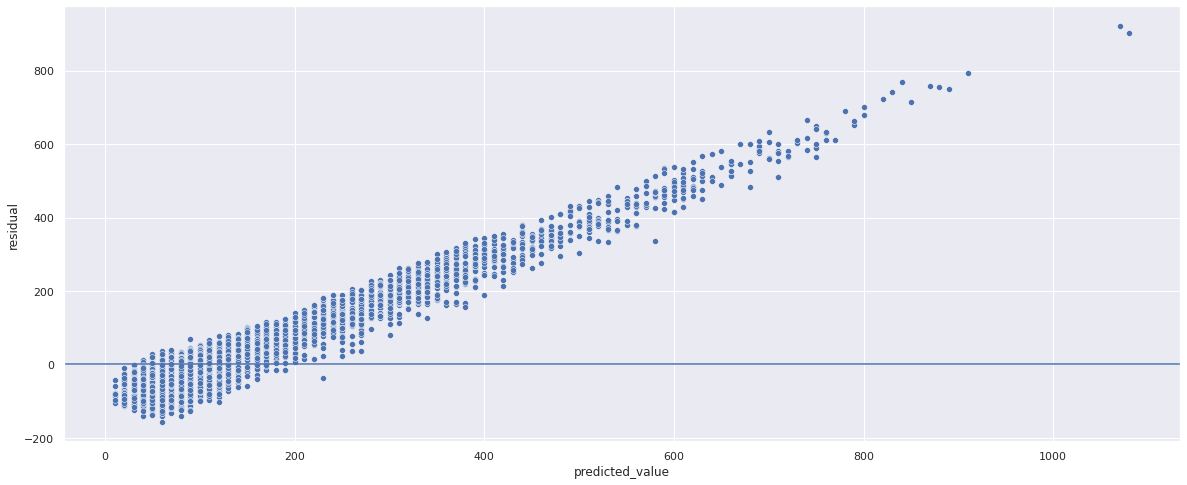

In [227]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_df_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Conclusion: 
1. The model seems to be underfitting because of r2 value is really low and the model did not predict the right value. 
2. Other machine learning model might be more suitable for the data.